In [46]:
def clearall():
    all = [var for var in globals() if var[0] != "_"]
    for var in all:
        del globals()[var]
clearall()

In [47]:
print('Importing Librairies...')
import numpy as np
import pandas as pd
import pandas_datareader as web
from colorama import Fore, Back, Style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
%matplotlib inline
import time
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
print('Librairies imported')

Importing Librairies...
Librairies imported


In [48]:
___Author___='LumberJack Jyss'
print(" Fin'Lab Depedencies",Fore.BLUE,
      '\n Global Optimized LumberJack Environment Motor',Style.RESET_ALL,'\n GOLEM 55 \n LumberJack Jyss 5779(c)')
print(Fore.BLUE,'°0Oo_D.A.G._26_oO0°',Style.RESET_ALL)
print(" INVESTING.COM'S COMMUNITY SENTIMENTS v1.00")
print('')

 Fin'Lab Depedencies  
 Global Optimized LumberJack Environment Motor  
 GOLEM 55 
 LumberJack Jyss 5779(c)
 °0Oo_D.A.G._26_oO0° 
 INVESTING.COM'S COMMUNITY SENTIMENTS v1.00



In [49]:
sentiments = pd.read_csv('prepared_data.csv')
sentiments = sentiments.drop('Unnamed: 0',axis=1)
sentiments.head()

,Date,Symbol,Name,Sentiment
0,2010-01-27,BA,Boeing Co,0
1,2010-12-15,BA,Boeing Co,0
2,2010-12-27,BA,Boeing Co,0
3,2011-01-25,BA,Boeing Co,1
4,2011-02-25,BA,Boeing Co,1


In [50]:
sentiments.iloc[11918,0][:4]

'2019'

In [51]:
sentiments_2018 = pd.DataFrame()
DATE = []
SYMBOL = []
NAME = []
SENTIMENT = []
tmps1=time.time()
for i in range(257,11918):
    print('\r Loop : ',i,'/11918',end='',flush=True)
    if sentiments.iloc[i,0][:4] == '2018':
        DATE.append(sentiments.iloc[i,0])
        SYMBOL.append(sentiments.iloc[i,1])
        NAME.append(sentiments.iloc[i,2])
        SENTIMENT.append(sentiments.iloc[i,3])
tmps2=round(time.time()-tmps1,2)
print ("\n Data prepared in = %f" %tmps2,'seconds')
sentiments_2018['Date'] = DATE
sentiments_2018['Symbol'] = SYMBOL
sentiments_2018['Name'] = NAME
sentiments_2018['Sentiments'] = SENTIMENT

 Loop :  11917 /11918
 Data prepared in = 10.230000 seconds


In [52]:
sentiments_2018.head(6)

,Date,Symbol,Name,Sentiments
0,2018-01-02,BA,Boeing Co,1
1,2018-01-03,BA,Boeing Co,1
2,2018-01-03,BA,Boeing Co,1
3,2018-01-03,BA,Boeing Co,1
4,2018-01-03,BA,Boeing Co,0
5,2018-01-05,BA,Boeing Co,1


In [53]:
sentiments_2018.tail()

,Date,Symbol,Name,Sentiments
4914,2018-12-20,CAT,Caterpillar,1
4915,2018-12-26,CAT,Caterpillar,0
4916,2018-12-26,CAT,Caterpillar,1
4917,2018-12-28,CAT,Caterpillar,1
4918,2018-12-31,CAT,Caterpillar,1


In [54]:
sentiments_2018.to_csv('sentiments_2018.csv')

In [55]:
df = pd.read_csv('prepared_data.csv')
compteur = pd.read_csv('compteur.csv')
df = df.drop('Unnamed: 0',axis=1)
compteur = compteur.drop('Unnamed: 0',axis=1)
compteur.head()

,Symb.,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ACN,Accenture plc,Information Technology


In [56]:
for i in range(0,compteur.shape[0]):
    if compteur.iloc[i,0] == 'BA':
        print('\r ',compteur.iloc[i,2],end='',flush=True)

  Industrials

In [57]:
INDUSTRIALS = []
for i in range(0,compteur.shape[0]):
    if compteur.iloc[i,2] == 'Industrials':
        if compteur.iloc[i,0] not in INDUSTRIALS:
            INDUSTRIALS.append(compteur.iloc[i,0])
len(INDUSTRIALS)

59

In [58]:
sentiments_INDU_2018 = pd.DataFrame()
DATE = []
SYMBOL = []
NAME = []
SENTIMENT = []
tmps1=time.time()
for i in range(0,sentiments_2018.shape[0]):
    if sentiments_2018.iloc[i,1] in INDUSTRIALS:
        DATE.append(sentiments_2018.iloc[i,0])
        SYMBOL.append(sentiments_2018.iloc[i,1])
        NAME.append(sentiments_2018.iloc[i,2])
        SENTIMENT.append(sentiments_2018.iloc[i,3])
tmps2=round(time.time()-tmps1,2)
print ("\n Data prepared in = %f" %tmps2,'seconds')
sentiments_INDU_2018['Date'] = DATE
sentiments_INDU_2018['Symbol'] = SYMBOL
sentiments_INDU_2018['Name'] = NAME
sentiments_INDU_2018['Sentiments'] = SENTIMENT


 Data prepared in = 0.120000 seconds


In [59]:
sentiments_INDU_2018 = sentiments_INDU_2018.sort_values('Date')
sentiments_INDU_2018.head(10)

,Date,Symbol,Name,Sentiments
0,2018-01-02,BA,Boeing Co,1
1338,2018-01-02,CAT,Caterpillar,0
1,2018-01-03,BA,Boeing Co,1
2,2018-01-03,BA,Boeing Co,1
3,2018-01-03,BA,Boeing Co,1
4,2018-01-03,BA,Boeing Co,0
1339,2018-01-03,CAT,Caterpillar,1
1340,2018-01-04,CAT,Caterpillar,1
1341,2018-01-04,CAT,Caterpillar,0
1342,2018-01-05,CAT,Caterpillar,1


In [60]:
sum_sent = sentiments_INDU_2018.iloc[0,3]
a = 0
signals_INDU_2018 = pd.DataFrame()
DATE = []
SECTOR = []
BULLISH = []
BEARISH = []
tmps1=time.time()
for i in range(1,sentiments_INDU_2018.shape[0]):
    a += 1
    if sentiments_INDU_2018.iloc[i,0] == sentiments_INDU_2018.iloc[i-1,0]:
        sum_sent = sum_sent + sentiments_INDU_2018.iloc[i,3]
    else:
        DATE.append(sentiments_INDU_2018.iloc[i-1,0])
        SECTOR.append('Industrials')
        BULLISH.append((sum_sent/a)*100)
        BEARISH.append(100-((sum_sent/a)*100))
        sum_sent = sentiments_INDU_2018.iloc[i,3]
        a = 0
        continue
tmps2=round(time.time()-tmps1,2)
print ("\n Data prepared in = %f" %tmps2,'seconds')
signals_INDU_2018['Date'] = DATE
signals_INDU_2018['Sector'] =  SECTOR
signals_INDU_2018['Bullish'] = BULLISH
signals_INDU_2018['Bearish'] = BEARISH



 Data prepared in = 0.060000 seconds


In [61]:
signals_INDU_2018.head()

,Date,Sector,Bullish,Bearish
0,2018-01-02,Industrials,50.0,50.0
1,2018-01-03,Industrials,80.0,20.0
2,2018-01-04,Industrials,50.0,50.0
3,2018-01-05,Industrials,80.0,20.0
4,2018-01-06,Industrials,100.0,0.0


In [62]:
sentiments_BA_2018 = pd.DataFrame()
DATE = []
SYMBOL = []
NAME = []
SENTIMENT = []
tmps1=time.time()
for i in range(0,sentiments_2018.shape[0]):
    if sentiments_2018.iloc[i,1] == 'BA':
        DATE.append(sentiments_2018.iloc[i,0])
        SYMBOL.append(sentiments_2018.iloc[i,1])
        NAME.append(sentiments_2018.iloc[i,2])
        SENTIMENT.append(sentiments_2018.iloc[i,3])
tmps2=round(time.time()-tmps1,2)
print ("\n Data prepared in = %f" %tmps2,'seconds')
sentiments_BA_2018['Date'] = DATE
sentiments_BA_2018['Symbol'] = SYMBOL
sentiments_BA_2018['Name'] = NAME
sentiments_BA_2018['Sentiments'] = SENTIMENT


 Data prepared in = 0.090000 seconds


In [64]:
sentiments_BA_2018.head(6)

,Date,Symbol,Name,Sentiments
0,2018-01-02,BA,Boeing Co,1
1,2018-01-03,BA,Boeing Co,1
2,2018-01-03,BA,Boeing Co,1
3,2018-01-03,BA,Boeing Co,1
4,2018-01-03,BA,Boeing Co,0
5,2018-01-05,BA,Boeing Co,1


In [67]:
sum_sent = sentiments_BA_2018.iloc[0,-1]
a = 0
signals_BA_2018 = pd.DataFrame()
DATE = []
SYMBOL = []
NAME = []
BULLISH = []
BEARISH = []
NUMBER = []
tmps1=time.time()
for i in range(1,sentiments_BA_2018.shape[0]):
    print('\r Loop ',i,sentiments_BA_2018.shape[0]-1,end='',flush=True)
    a += 1
    if sentiments_BA_2018.iloc[i,0] == sentiments_BA_2018.iloc[i-1,0]:
        sum_sent = sum_sent + sentiments_BA_2018.iloc[i,-1]
    else:
        DATE.append(sentiments_BA_2018.iloc[i-1,0])
        SYMBOL.append(sentiments_BA_2018.iloc[i,1])
        NAME.append(sentiments_BA_2018.iloc[i,2])
        BULLISH.append((sum_sent/a)*100)
        BEARISH.append(100-((sum_sent/a)*100))
        NUMBER.append(a)
        sum_sent = sentiments_BA_2018.iloc[i,3]
        a = 0
        continue
tmps2=round(time.time()-tmps1,2)
print ("\n Data prepared in = %f" %tmps2,'seconds')
signals_BA_2018['Date'] = DATE
signals_BA_2018['Symbol'] = SYMBOL
signals_BA_2018['Name'] = NAME
signals_BA_2018['Bullish'] = BULLISH
signals_BA_2018['Bearish'] = BEARISH
signals_BA_2018['# of signals'] = NUMBER



 Loop  1337 1337
 Data prepared in = 1.310000 seconds


In [79]:
signals_BA_2018.head()

,Date,Symbol,Name,Bullish,Bearish,# of signals
0,2018-01-02,BA,Boeing Co,100.000000,0.000000,1
1,2018-01-03,BA,Boeing Co,75.000000,25.000000,4
2,2018-01-05,BA,Boeing Co,66.666667,33.333333,3
3,2018-01-06,BA,Boeing Co,100.000000,0.000000,1
4,2018-01-07,BA,Boeing Co,100.000000,0.000000,2


In [71]:
tmps1=time.time()
start = signals_BA_2018.iloc[0,0]
end = signals_BA_2018.iloc[-1,0]
df = web.DataReader('BA', 'yahoo', start, end)
tmps2=round(time.time()-tmps1,2)
print ("\n Data scraped in = %f" %tmps2,'seconds')


 Data scraped in = 0.970000 seconds



 Job done in = 0.330000 seconds


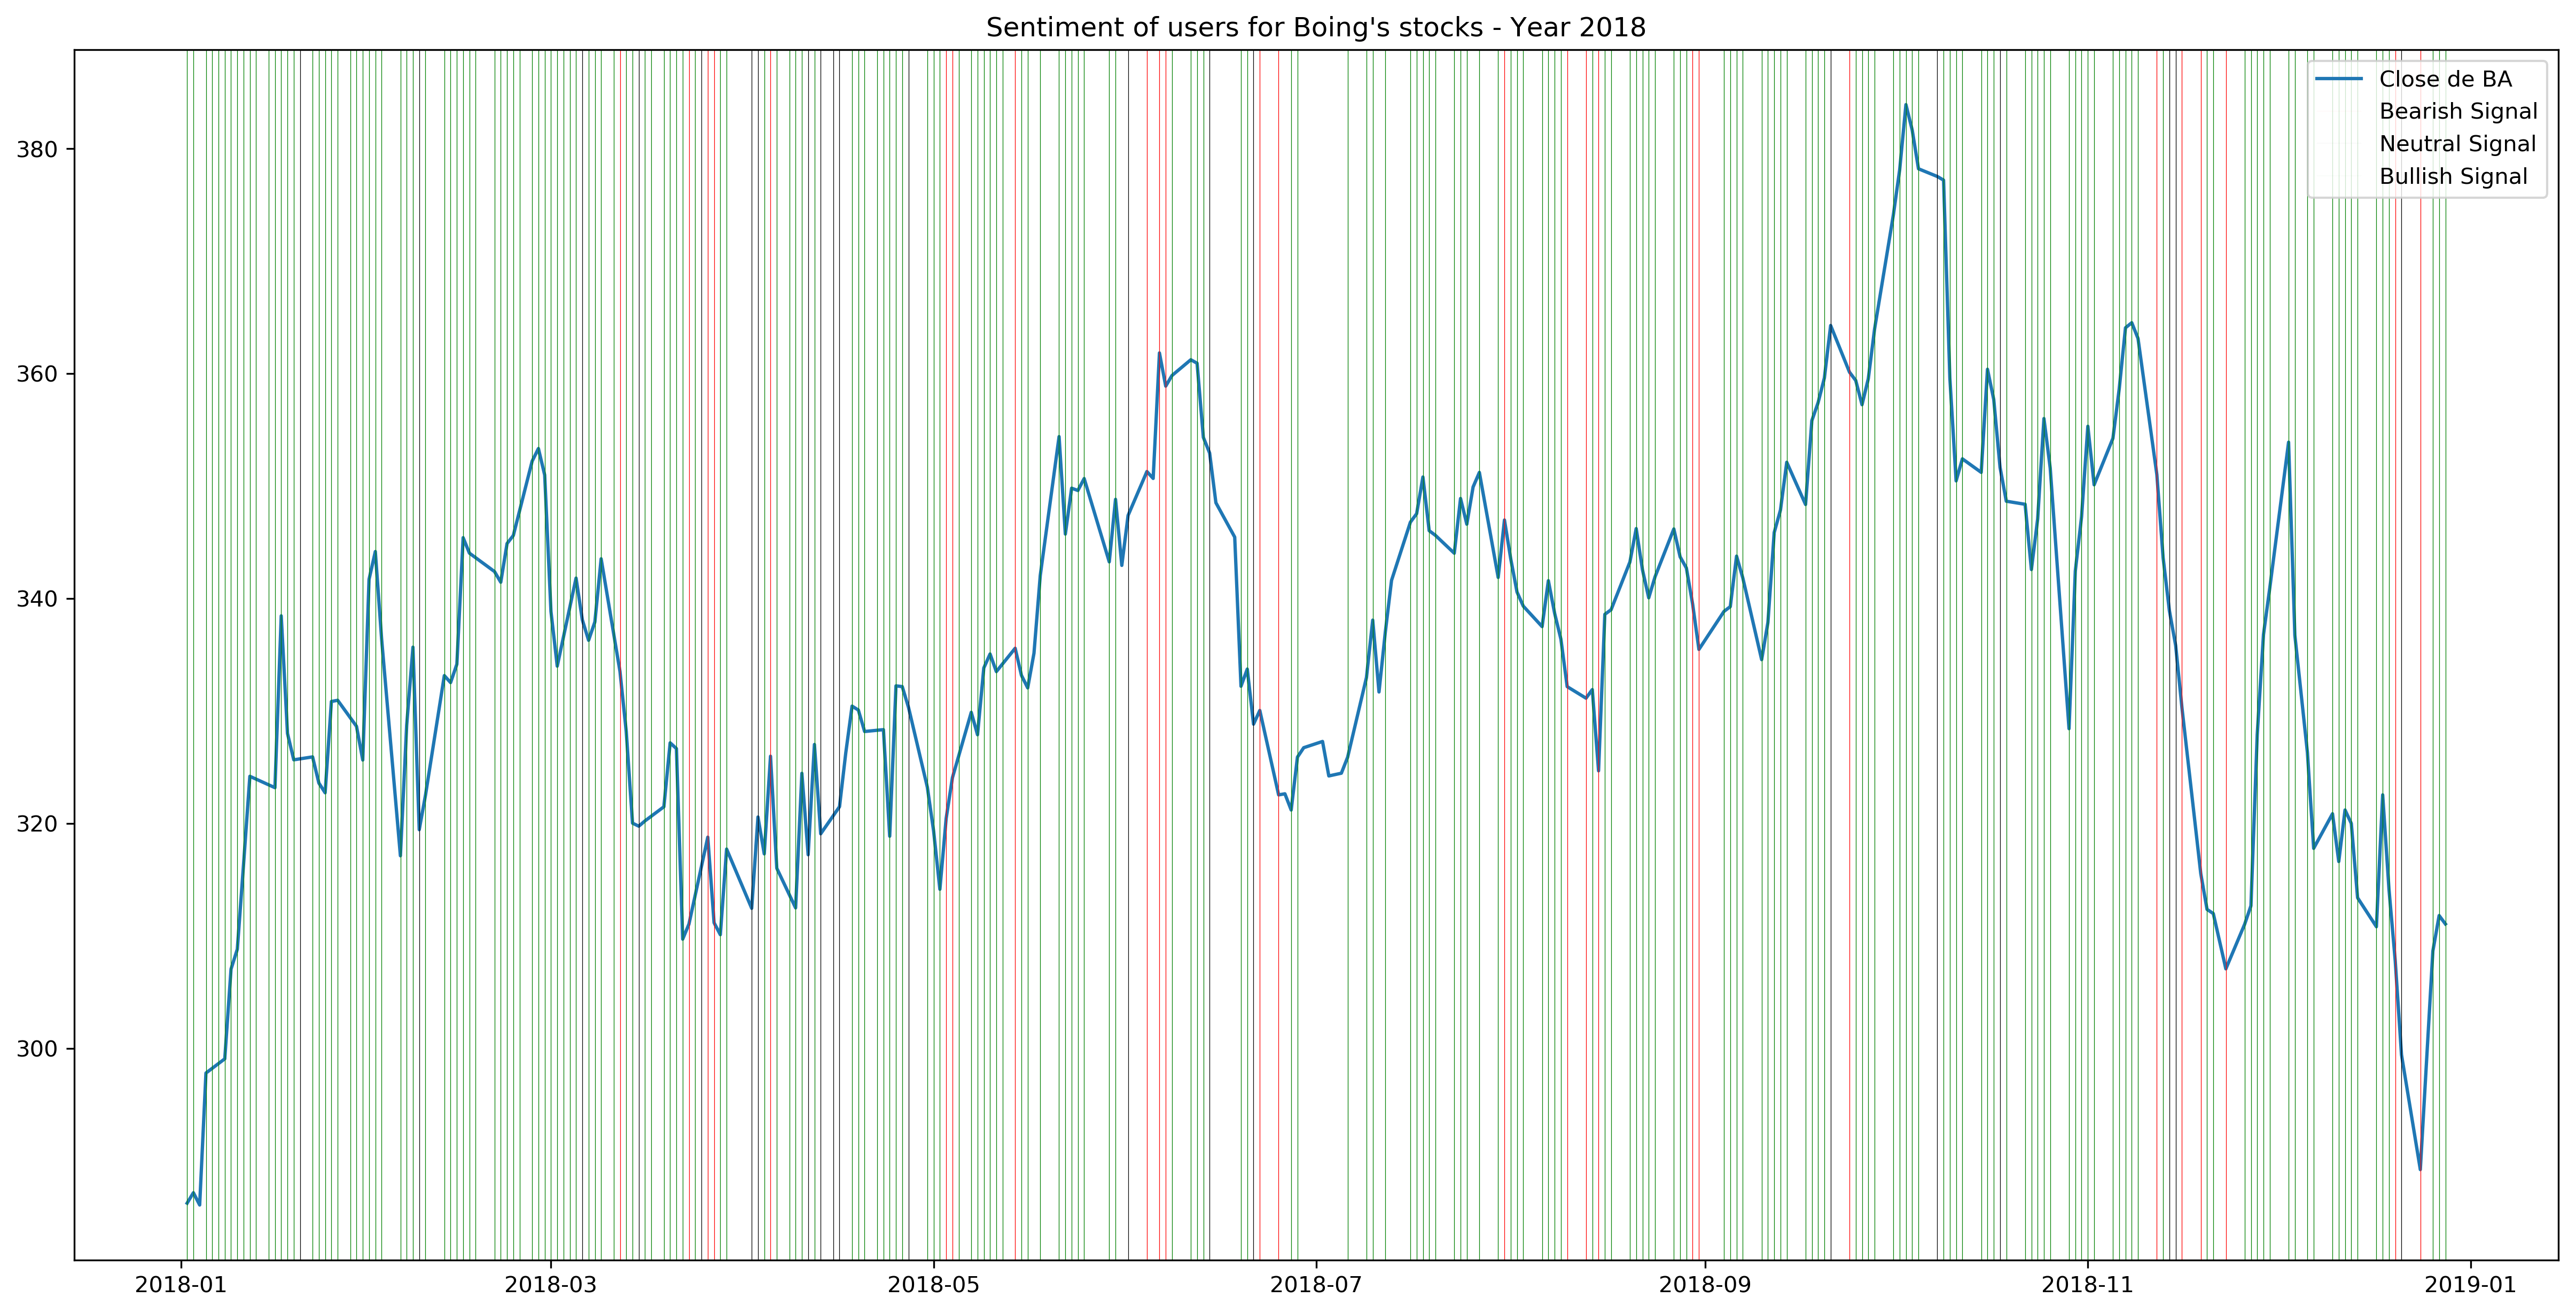

In [83]:
tmps1=time.time()
plt.figure(figsize=(20,10),dpi=300)
plt.title("Sentiment of users for Boing's stocks - Year 2018")
plt.plot(df['Adj Close'],label='Close de BA')
for foo in range(0,signals_BA_2018.shape[0]):
    if signals_BA_2018.iloc[foo,3] > 50:
        plt.axvline(x=signals_BA_2018.iloc[foo,0],color='green',lw=0.3)
    elif signals_BA_2018.iloc[foo,3] < 50:
        plt.axvline(x=signals_BA_2018.iloc[foo,0],color='red',lw=0.3)
    else:
        plt.axvline(x=signals_BA_2018.iloc[foo,0],color='black',lw=0.3)
plt.axvline(x=signals_BA_2018.iloc[-4,0],color='red',lw=0.01,label='Bearish Signal')
plt.axvline(x=signals_BA_2018.iloc[-5,0],color='black',lw=0.01,label='Neutral Signal')
plt.axvline(x=signals_BA_2018.iloc[0,0],color='green',lw=0.01,label='Bullish Signal')

plt.legend()
tmps2=round(time.time()-tmps1,2)
print ("\n Job done in = %f" %tmps2,'seconds')